***Question 1***
---

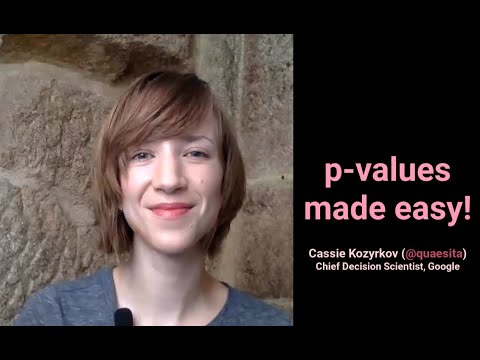

In [1]:

from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)


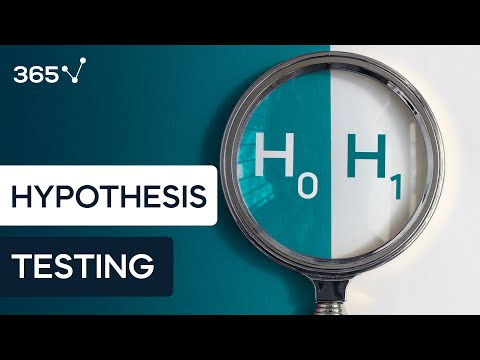

In [2]:

from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

Ideas which can be tested statistically must be quantifiable. For example, we can only find the p value of quantifiable datasets. We cannot evaluate the p value of how happy a population is, unless we give a specific number to that feeling. This data must be quantifiably measurable and, of course, observable. A good null hypothesis, assumes that we are in the base case of a situation. It assumes that nothing out of the oridnary will happen. A alternate hypothesis in hypothesis testing, is the opposite of a null hypothesis. It assumes that whatever the null hypothesis claims is false. It assumes that something will change. 


***ChatGPT Chat Summary***

We discussed the key factor that distinguishes ideas that can be examined and tested statistically from those that cannot. The main point is **quantifiability**—ideas must involve measurable, observable data and clear relationships between variables to be statistically analyzed. Abstract or subjective concepts, or those lacking measurable data, cannot be statistically tested.

link: https://chatgpt.com/share/67007109-8a80-800d-b9e4-0494ff7b345d

***Question 2***
---

The sentence: "It is important to note that outcomes of tests refer to the population parameter, rather than the sample statistic! As such, the result that we get is for the population.", states that our testing gives us information about attributes of the population (mean, variance, mean) not the sample. This is because, in statsitics, most samples are not representitive of the population, so finding the mean of the sample is not analogous to finding the mean of the population. Thus we must employ other techniques, such as bootstrapping, to use the parameters of our sample to discover information about the population parameter. This new discovered information about the population may be different from the information we had about our sample, so it is important to distnguish the two. 

**ChatGPT Chat Summary**

You asked for a simple explanation of the sentence "outcomes of tests refer to the population parameter, rather than the sample statistic" and what it means in terms of statistics. I explained that the results from statistical tests help us make conclusions about a larger group (the population) based on the smaller group (the sample) we actually study. I also defined terms like sample, population, sample statistic, and population parameter.

Then, you asked for a simple explanation of the p-value, which I described as a measure of how likely it is that the result you found happened by chance. If the p-value is small, it suggests the result is significant, while a large p-value suggests it could have occurred by random variation.

link: https://chatgpt.com/share/67016128-c834-800d-af0d-33491ffc55ec

***Question 3***
---
When we calculate the p value of an event or statistic, we first assume a universe where things are perfectly normal. For example, if we want to calculate the p value of a vaccine which works, we first assume that the vaccine has no effect. After we have entered this hypothetical universe, we calculate the probability of what is happening in this universe. For example, what is the probability of the vaccine being able to improve patient's health in a universe where the vaccine has no effect? This probability is the p value. In essence, the p value is the probability of the alternate hypothesis occuring, in a universe where the null hypothesis is true. 

***Question 4***
---
As explained in question 3, the p value is the probability of getting the result we got in a universe where the null hypothesis is true. So a small p value means that there is a small probability of getting the result we got, in a universe where the null hypothesis is true. This implies that the null hypothesis is less likely to be true, because if it were true our results would be very improbable. For example, the p value of a vaccine killing 3/5 people in a universe where that vaccine does nothing is very low. Implying that the vaccine must do something, and the probability of it doing nothing is ridiculous.  

***Question 5***
---



In [3]:
import numpy as np

# Parameters
n_trials = 124  # Number of couples
n_right_tilts_observed = 80  # Observed number of right tilts
n_simulations = 10000  # Number of simulations

# Simulate 50/50 coin flips (right tilts are represented as "1")
simulations = np.random.binomial(n_trials, 0.5, size=n_simulations)

# Calculate the p-value as the proportion of simulations where right tilts are >= observed
p_value = np.sum(simulations >= n_right_tilts_observed) / n_simulations

print(f"P-value: {p_value}")


P-value: 0.0006


The p value for this occuring is 0.0006. According to the chart there is very strong evidence against people having no preference to tilting heads. 

***Question 6***
---
It is impossible to definitively prove that the null hypothesis is false,unless the p value is 0. This is because a small p value implies that there is a small chance of the current situation happening when the null hypothesis is true. Meaning that it is possible to be in the current situation we are in when the null hypothesis is correct. No matter how small the p value, there is still a chance that the null hypothesis is correct. Alternatively a high p value does not nessecarily prove that the null hypothesis is correct, it simply shows there is very little evidence against the null hypothesis. 

**ChatGPT Chat Summary**

We discussed the concept of p-values in hypothesis testing. You asked whether a smaller p-value can definitively prove that the null hypothesis is false, and if a p-value can definitively prove Fido's innocence or guilt (based on an example from a video). I explained that p-values do not provide definitive proof but rather suggest whether the evidence supports rejecting or failing to reject the null hypothesis.

link: https://chatgpt.com/share/6703fc99-25b0-800d-982e-3958160af2f4

***Question 7***
---



Here is the code of the p value, where the patient's health is improving. 

In [9]:
import pandas as pd
import numpy as np

# Patient dataset
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate the observed improvement
patient_data['HealthImprovement'] = patient_data['FinalHealthScore'] - patient_data['InitialHealthScore']
observed_mean_improvement = patient_data['HealthImprovement'].mean()

# Bootstrap simulation parameters
n_simulations = 10000
simulated_means = []

# Perform bootstrap sampling
for _ in range(n_simulations):
    bootstrap_sample = np.random.choice(patient_data['HealthImprovement'], size=len(patient_data), replace=True)
    simulated_means.append(np.mean(bootstrap_sample))

# Convert to array for easier calculations
simulated_means = np.array(simulated_means)

# Calculate the one-sided p-value (proportion of simulated means > observed mean improvement)
p_value_simulation = np.mean(simulated_means > observed_mean_improvement)

print(f"Observed mean improvement: {observed_mean_improvement}")
print(f"Simulated p-value: {p_value_simulation}")

Observed mean improvement: 3.3
Simulated p-value: 0.4868


**ChatGPT Chat Summary**
Here's a summary of our chat:

- You asked about the difference between **one-sided** and **two-sided** (or **one-tailed** and **two-tailed**) hypothesis tests.
  - **One-sided** tests focus on detecting an effect in a single direction (e.g., whether something is greater than or less than a specific value).
  - **Two-sided** tests check for any difference, regardless of direction (i.e., whether something is different from a specific value, in either direction).
  
- You provided a dataset of patients' health scores and asked to find the **one-sided p-value** to test whether their health improved.
  - I provided a Python code solution using a one-sided **t-test**, which returned a p-value of **0.0146**, indicating significant health improvement.

- You asked for a simulation of the p-value. I provided Python code for a **bootstrap simulation** to estimate the one-sided p-value by resampling the dataset and comparing simulated mean improvements to the observed mean improvement.

link: https://chatgpt.com/share/670403f5-5b60-800d-8c2b-3206ee7c2102

***Question 8***
---

***Problem Introduction***

The goal of this analysis is to simulate the Fisher's Tea experiment in a hypothetical sta130 classroom scenario. The Fisher's Tea experiment found the p value of Dr. Muriel Bristol correctlty guessing whether 8 cups of tea were poured milk first or tea first. In our sta130 classroom scenario, we are also trying to find the p value of 49/80 students correctly guessing whether a cup of tea was poured milk first or tea first. We will use this p value to infer the likelyhood that there is no difference in taste between tea poured milk first and tea  poured tea first (the null hypothesis). 


***Population and Sample Data***

In this analysis, we have sampled 80 out of the total 500 sta130 students. Of the 80 students in our sample, 49 were able to correctly guess the tea/milk pouring order and 31 students were unable to guess the pouring order. This is roughly a 61.25% accuracy rate for student guesses. It is important to note that our sample's accuracy rate is not indicative of the accuracy rate of the population, which is why we must use the null hypothesis and p values to test the plausibility of the null/alternative hypothesis. 


***Hypothesis***

Null hypothesis - The null hypothesis in this scenario, is that there is no difference in the taste between tea poured milk first and tea poured tea first. If the null hypothesis is true then students should have a roughly 50% accuracy rate in their guess because they only have two options (tea first, milk first).

Alternative hypothesis - The alternative hypothesis states the inverse of the null hypothesis, and that there is a difference between the taste of tea poured milk first and tea first. If this were true, then student's guesses should have a higher accuracy rate because they should be able to taste the difference!

***Methodology***

1. Note down current success rate
2. Bootrstrap our sample under null hypothesis conditions
3. Find the mean of each bootstrap under null hypothesis conditions
4. Conitinously simulate this bootstrap method 
5. Graph this data.
6. See what porportion of data in these simulations were more extreme then our original success rate to generate p value


***Quantitative Analysis***

We will first note down the success rate of our current sample. 


In [2]:

import pandas as pd
import numpy as np
curr_mean = 49/80 #variable to rememeber original sample mean


Next, we prepare to simulate a universe where the null hypothsis is true. 

In [4]:
number_of_simulations = 1000 #number of simulations we will do
bootstrap_means = np.zeros(number_of_simulations) #array to keep track of simulation results

for i in range(number_of_simulations):
    random_rate = np.random.choice([0,1], size=80, replace=True) #simulate null hypothesis, where 1 = correct guess and 0 = incorrect guess
    bootstrap_means[i] = random_rate.mean()

bootstrap_means

array([0.4625, 0.4875, 0.4375, 0.4875, 0.6375, 0.4375, 0.5   , 0.4625,
       0.45  , 0.4625, 0.5375, 0.55  , 0.55  , 0.4625, 0.4375, 0.5125,
       0.4625, 0.475 , 0.55  , 0.525 , 0.4625, 0.65  , 0.3875, 0.45  ,
       0.525 , 0.5125, 0.625 , 0.4875, 0.4625, 0.4125, 0.4625, 0.45  ,
       0.5   , 0.4875, 0.4875, 0.4875, 0.5625, 0.55  , 0.525 , 0.375 ,
       0.5125, 0.6125, 0.5625, 0.55  , 0.475 , 0.4375, 0.525 , 0.475 ,
       0.45  , 0.4625, 0.4625, 0.475 , 0.45  , 0.4625, 0.6   , 0.425 ,
       0.5625, 0.5125, 0.4125, 0.5375, 0.4625, 0.4125, 0.6125, 0.525 ,
       0.5125, 0.5125, 0.6125, 0.475 , 0.575 , 0.3625, 0.4375, 0.4125,
       0.525 , 0.525 , 0.4625, 0.4375, 0.5375, 0.45  , 0.45  , 0.5125,
       0.5625, 0.5625, 0.5   , 0.45  , 0.6   , 0.525 , 0.3875, 0.5125,
       0.45  , 0.5125, 0.4625, 0.55  , 0.4375, 0.375 , 0.4625, 0.5875,
       0.45  , 0.475 , 0.4875, 0.4375, 0.5   , 0.475 , 0.475 , 0.45  ,
       0.55  , 0.525 , 0.5125, 0.55  , 0.5375, 0.575 , 0.5   , 0.525 ,
      

We can visualize this data

Text(0.5, 1.0, 'Histogram of Data')

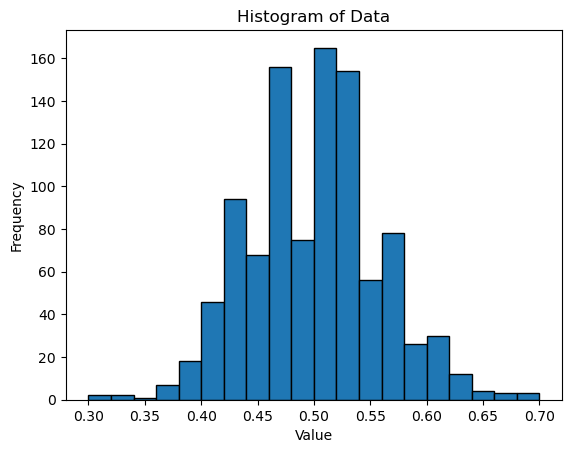

In [13]:
import matplotlib.pyplot as plt
plt.hist(bootstrap_means, bins=20, edgecolor='black')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')


Now we find the poportion of data points greater than our original accuracy rate. 

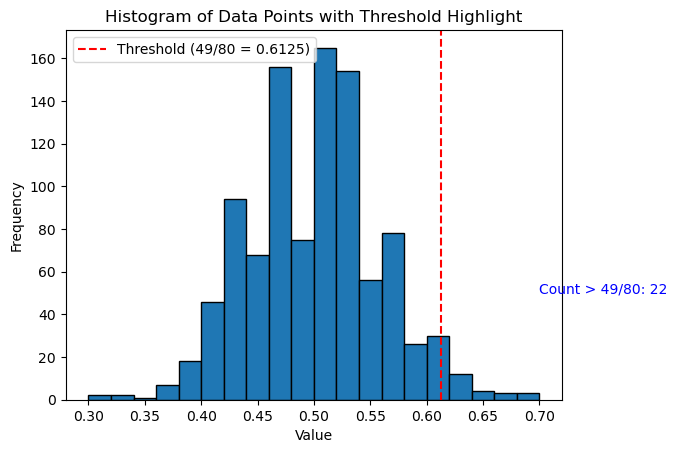

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data array
data = bootstrap_means

# Threshold value (49/80)
threshold = 49 / 80

# Number of data points greater than 49/80
count_above_threshold = np.sum(data > threshold)

# Create histogram
plt.hist(data, bins=20, edgecolor='black')

# Highlight threshold line
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold (49/80 = {threshold})')

# Add text showing the number of data points greater than 49/80
plt.text(0.7, 50, f'Count > 49/80: {count_above_threshold}', color='blue')

# Title and labels
plt.title("Histogram of Data Points with Threshold Highlight")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Show plot
plt.show()

In [15]:
import numpy as np


# Define the threshold value (49/80)
threshold = 49/80

# Calculate how many points are greater than 49/80
greater_than_threshold = np.sum(np.array(bootstrap_means) > threshold)

# Calculate the proportion of such points over the total points
proportion = greater_than_threshold / len(bootstrap_means)

print(f"p value is {proportion}")

p value is 0.022


***Conclusion***

From this we see that the p value is 0.022, this means that there is very little evidence supporting the null hypothesis and we cannot reject the alternative hypothesis as such. 

***ChatGPT Chat Log***

In this chat, you requested help in calculating statistical measures from a dataset. Initially, you asked for the p-value with a null hypothesis value of 0.5 and discussed proportions of data points exceeding a specific threshold (49/80). I provided Python code to compute the proportion of data points greater than 49/80 from your dataset, and walked through the approach step-by-step to achieve this. 

Let me know if you'd like further assistance!

link: https://chatgpt.com/share/67047b00-8624-800d-a6ef-a8764bcf0027
